# 

In [ ]:
#Task : Object detection
#Description : Object detection in an image or a video using pre-trained MobileNet-SSD architecture based on tensorflow
#Author : Rohan Ijare

In [1]:
#import OpenCV, Numpy and Matplotlib libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load configuration file and pre-trained model
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
pre_trained_model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [11]:
#load coco class labels
classLabels = [] #intialize empty python list
classes = 'classes_labels.txt'
with open(classes,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')   

In [12]:
#configuration setup
pre_trained_model.setInputSize(320,320)
pre_trained_model.setInputScale(1.0/127.5) # 255/2 = 127.5
pre_trained_model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1,1]
pre_trained_model.setInputSwapRB(True)

<dnn_Model 000001ABDCA8A150>

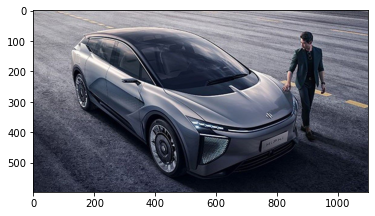

In [25]:
#read an image
image = cv2.imread('ce73c6b019f0ada7224184f1bfabde70.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [26]:
#running pre-trained model on image for object detection
classInd,confidence,box=pre_trained_model.detect(image,0.5)

In [27]:
#display class of the object detected and draw a box for the detected object
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classInd.flatten(), confidence.flatten(), box):
    cv2.rectangle(image,boxes,(0, 255, 0), 2 )
    cv2.putText(image,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(255, 0, 0), thickness = 3 )

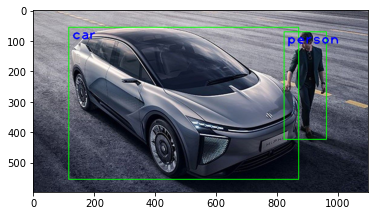

In [29]:
#display the output
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [30]:
#Object detection in a video
cap = cv2.VideoCapture('mixkit-times-square-during-a-rainy-night-4332.mp4')

if not cap.isOpened():
    cap=cv2.videocapture(0)
if not cap.isOpened():
    raise IOerror("cannot open video")

font_scale =3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex , confidence , bbox = pre_trained_model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0) :
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0), thickness = 3 )
    cv2.imshow('Object Detection Tutorial ' , frame)

    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
# When everything done, release the capture and destroy the windows
cap.realase()
cv2.destroyAllWindows()

[[10]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [28]
 [10]
 [ 3]
 [ 1]
 [ 6]
 [ 1]
 [ 3]]
[[10]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [28]
 [ 1]
 [ 3]
 [ 3]
 [ 6]
 [ 1]
 [ 3]]
[[10]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [28]
 [ 3]
 [ 3]
 [ 1]]
[[10]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [10]
 [ 1]
 [28]
 [ 1]
 [ 3]
 [ 6]
 [ 1]
 [ 1]]
[[10]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 1]
 [28]
 [ 6]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[10]
 [ 3]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [28]
 [ 6]
 [ 6]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[10]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [10]
 [ 1]]
[[10]
 [ 3]
 [ 1]
 [ 3]
 [28]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [ 1]
 [10]
 [ 3]
 [ 1]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [28]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 3]]
[[ 3]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [28]
 [ 1]
 [10

AttributeError: 'cv2.VideoCapture' object has no attribute 'realase'